In [3]:
pip install requests pandas numpy matplotlib plotly streamlit langchain transformers seaborn


Active code page: 1252
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


🔍 Dataset Loaded Successfully!
Total Rows: 203
Total Columns: 25

📊 Columns in dataset:
['state_name', 'district_name', 'crop_year', 'season', 'crop', 'area_', 'production_', 'subdivision', 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec', 'annual', 'jf', 'mam', 'jjas', 'ond']

🏛️ Unique States in Dataset:
['andaman and nicobar islands']

🌾 Unique Crops in Dataset:
['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut', 'Coconut', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca', 'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric', 'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut', 'Sunflower']

📅 Crop Year Range: 2000 - 2010

🏛️ Number of Records by State:
state_name
andaman and nicobar islands    203
Name: count, dtype: int64


c:\Users\satya\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


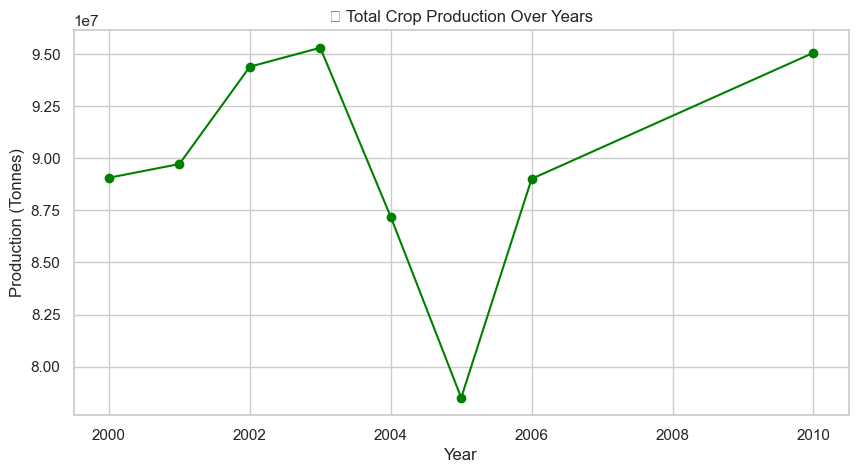

c:\Users\satya\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\satya\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


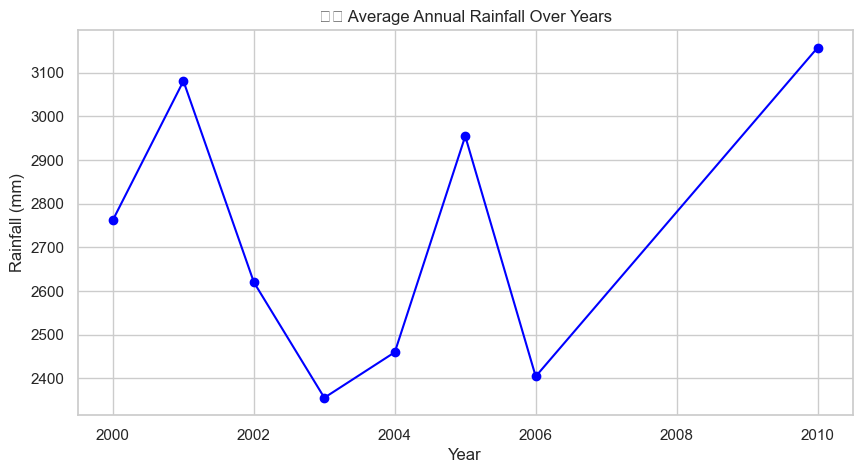

c:\Users\satya\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


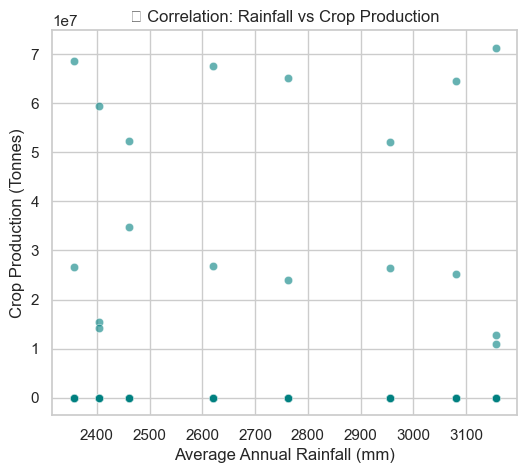

C:\Users\satya\AppData\Local\Temp\ipykernel_98312\2703230501.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette='Greens_r')
c:\Users\satya\anaconda3\envs\myenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


🔗 Correlation between Rainfall & Production: -0.033


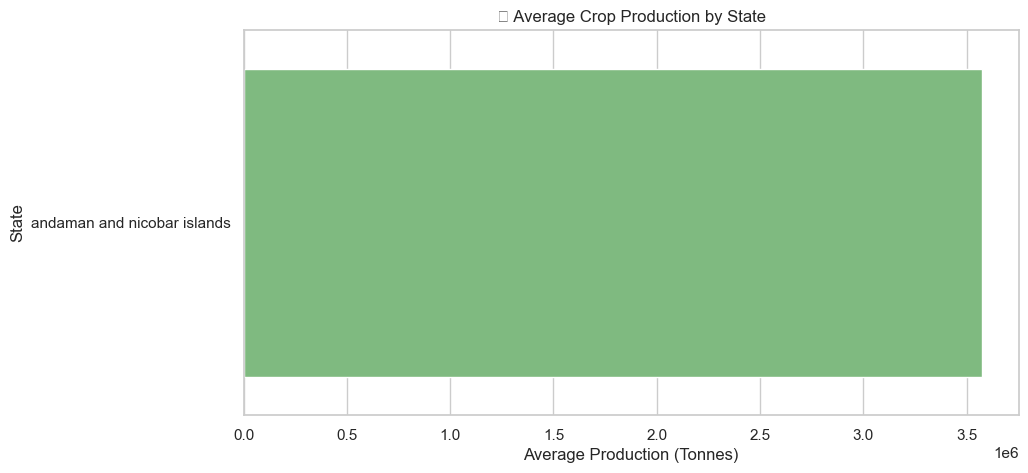


📊 Summary Statistics:
          area_  production_   annual
count    203.00       201.00   203.00
mean    1664.51   3573249.95  2761.79
std     3784.62  13116121.83   317.31
min        0.20         0.10  2355.90
25%       46.65        35.95  2404.70
50%      145.26       402.00  2763.20
75%      950.79      2350.00  3119.00
max    18394.70  71300000.00  3157.10

💾 Cleaned dataset saved to: ../hybrid_dataset/merged_cleaned.csv

✅ Notebook Analysis Completed Successfully!
🎯 You can now proceed to Phase 2 (Intelligent Q&A System).


In [7]:
# ===============================================
# 🌾 Project Samarth - Notebook 02
# Phase 1: Data Integration Analysis (Final)
# ===============================================

# ✅ Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Visualization Settings
sns.set(style="whitegrid")
plt.rcParams['font.size'] = 11
plt.rcParams['figure.figsize'] = (10, 5)

# ✅ Step 2: Load Integrated Dataset
data_path = "../hybrid_dataset/merged_agri_rainfall.csv"
df = pd.read_csv(data_path)

print("🔍 Dataset Loaded Successfully!")
print(f"Total Rows: {len(df)}")
print(f"Total Columns: {len(df.columns)}")

print("\n📊 Columns in dataset:")
print(df.columns.tolist())

# ✅ Step 3: Quick Data Summary
print("\n🏛️ Unique States in Dataset:")
print(df['state_name'].dropna().unique().tolist())

print("\n🌾 Unique Crops in Dataset:")
print(df['crop'].dropna().unique().tolist()[:20])

print("\n📅 Crop Year Range:", int(df['crop_year'].min()), "-", int(df['crop_year'].max()))

# ✅ Step 4: Basic Cleaning & Conversion
df.columns = df.columns.str.lower().str.strip()

# Convert numeric columns safely
for col in ['area_', 'production_', 'annual', 'jjas', 'jf', 'mam', 'ond']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# ✅ Step 5: State-Wise Summary
print("\n🏛️ Number of Records by State:")
print(df['state_name'].value_counts())

# ✅ Step 6: Visualize Crop Production Over Time
if 'crop_year' in df.columns and 'production_' in df.columns:
    yearly_prod = df.groupby('crop_year')['production_'].sum()
    plt.figure(figsize=(10,5))
    yearly_prod.plot(kind='line', marker='o', color='green')
    plt.title("📈 Total Crop Production Over Years")
    plt.xlabel("Year")
    plt.ylabel("Production (Tonnes)")
    plt.grid(True)
    plt.show()

# ✅ Step 7: Average Rainfall Trend
if 'crop_year' in df.columns and 'annual' in df.columns:
    yearly_rain = df.groupby('crop_year')['annual'].mean()
    plt.figure(figsize=(10,5))
    yearly_rain.plot(kind='line', marker='o', color='blue')
    plt.title("🌦️ Average Annual Rainfall Over Years")
    plt.xlabel("Year")
    plt.ylabel("Rainfall (mm)")
    plt.grid(True)
    plt.show()

# ✅ Step 8: Compare Rainfall vs Production (Correlation)
if all(col in df.columns for col in ['annual', 'production_']):
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=df, x='annual', y='production_', alpha=0.6, color='teal')
    plt.title("🌾 Correlation: Rainfall vs Crop Production")
    plt.xlabel("Average Annual Rainfall (mm)")
    plt.ylabel("Crop Production (Tonnes)")
    plt.grid(True)
    plt.show()

    corr_value = df[['annual', 'production_']].corr().iloc[0, 1]
    print(f"🔗 Correlation between Rainfall & Production: {round(corr_value, 3)}")

# ✅ Step 9: State-wise Average Production (Bar Chart)
plt.figure(figsize=(10,5))
state_avg = df.groupby('state_name')['production_'].mean().sort_values(ascending=False)
sns.barplot(x=state_avg.values, y=state_avg.index, palette='Greens_r')
plt.title("🌾 Average Crop Production by State")
plt.xlabel("Average Production (Tonnes)")
plt.ylabel("State")
plt.show()

# ✅ Step 10: Summary Statistics
print("\n📊 Summary Statistics:")
print(df[['area_', 'production_', 'annual']].describe().round(2))

# ✅ Step 11: Save Cleaned Version (Optional)
cleaned_path = "../hybrid_dataset/merged_cleaned.csv"
df.to_csv(cleaned_path, index=False)
print(f"\n💾 Cleaned dataset saved to: {cleaned_path}")

print("\n✅ Notebook Analysis Completed Successfully!")
print("🎯 You can now proceed to Phase 2 (Intelligent Q&A System).")
